In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import tree

#likelyhood to start driving based on city, signup-os, and signup_channel
df = pd.read_csv('ds_challenge_v2_1_data.csv')
df_new = df.copy()
df_new.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN


In [2]:
df_new.info()
df_new.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    54681 non-null  int64  
 1   city_name             54681 non-null  object 
 2   signup_os             47824 non-null  object 
 3   signup_channel        54681 non-null  object 
 4   signup_date           54681 non-null  object 
 5   bgc_date              32896 non-null  object 
 6   vehicle_added_date    13134 non-null  object 
 7   vehicle_make          13223 non-null  object 
 8   vehicle_model         13223 non-null  object 
 9   vehicle_year          13223 non-null  float64
 10  first_completed_date  6137 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB


Index(['id', 'city_name', 'signup_os', 'signup_channel', 'signup_date',
       'bgc_date', 'vehicle_added_date', 'vehicle_make', 'vehicle_model',
       'vehicle_year', 'first_completed_date'],
      dtype='object')

In [3]:
df_completed = df_new.dropna(subset=['signup_date', 'first_completed_date'])
#drivers who completed their first ride

df_not_completed = df_new[df_new['first_completed_date'].isnull()]

In [34]:
#Check unique values and their counts for categorical columns
categorical_cols = ['city_name', 'signup_os', 'signup_channel', 'vehicle_make', 'vehicle_model']

for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df_completed[col].value_counts())
    print(f"Null values: {df_completed[col].isnull().sum()}")


Unique values in city_name:
city_name
Strark     3239
Berton     2437
Wrouver     461
Name: count, dtype: int64
Null values: 0

Unique values in signup_os:
signup_os
ios web        2191
android web    1454
mac             948
windows         898
other           498
Name: count, dtype: int64
Null values: 148

Unique values in signup_channel:
signup_channel
Referral    3445
Paid        1482
Organic     1210
Name: count, dtype: int64
Null values: 0

Unique values in vehicle_make:
vehicle_make
Toyota           1535
Honda             860
Nissan            562
Ford              351
Hyundai           288
Chevrolet         258
Kia               254
Volkswagen        220
Lexus             161
Dodge             160
Mercedes-Benz     152
BMW               138
Mazda             129
Subaru             93
Acura              89
Jeep               89
Scion              79
Chrysler           78
Audi               61
Infiniti           57
GMC                42
Mitsubishi         37
Cadillac           3

In [4]:
#Check unique values and their counts for categorical columns
categorical_cols = ['city_name', 'signup_os', 'signup_channel', 'vehicle_make', 'vehicle_model']

for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df_new[col].value_counts())
    print(f"Null values: {df_new[col].isnull().sum()}")


Unique values in city_name:
city_name
Strark     29557
Berton     20117
Wrouver     5007
Name: count, dtype: int64
Null values: 0

Unique values in signup_os:
signup_os
ios web        16632
android web    14944
windows         6776
mac             5824
other           3648
Name: count, dtype: int64
Null values: 6857

Unique values in signup_channel:
signup_channel
Paid        23938
Referral    17316
Organic     13427
Name: count, dtype: int64
Null values: 0

Unique values in vehicle_make:
vehicle_make
Toyota           3219
Honda            1845
Nissan           1311
Ford              778
Hyundai           677
Chevrolet         665
Kia               584
Volkswagen        503
Dodge             393
Mercedes-Benz     348
Lexus             335
BMW               330
Mazda             292
Subaru            221
Jeep              203
Chrysler          202
Acura             190
Scion             164
Infiniti          147
Audi              144
Mitsubishi        113
GMC                89
Cadillac

[Text(0.5, 0, 'City'), Text(0, 0.5, 'Sign Up Count')]

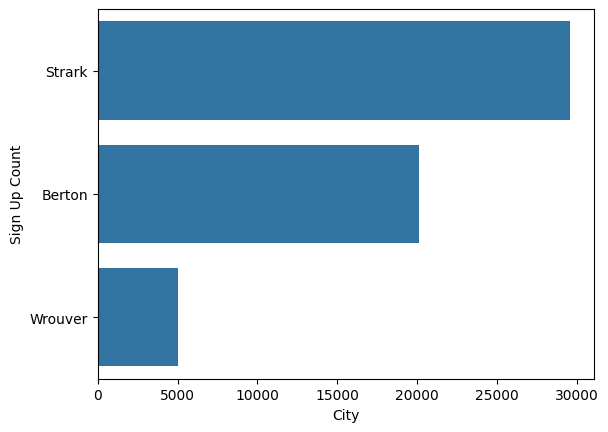

In [5]:
city_counts = df_new['city_name'].value_counts()

city_bar = sns.barplot(x=city_counts.values, y=city_counts.index)
city_bar.set(xlabel='City', ylabel='Sign Up Count')

[Text(0.5, 0, 'Signup Channel'), Text(0, 0.5, 'City Name')]

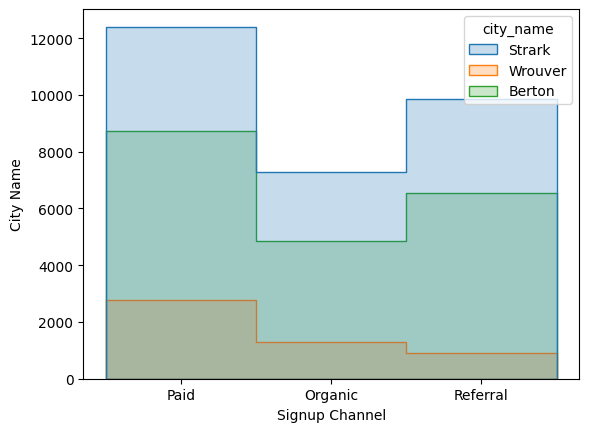

In [6]:
city_hist =sns.histplot(df_new, x="signup_channel", hue = "city_name", element = "step")
city_hist.set(xlabel='Signup Channel', ylabel='City Name')

[Text(0.5, 0, 'Signup Channel'), Text(0, 0.5, 'Strark')]

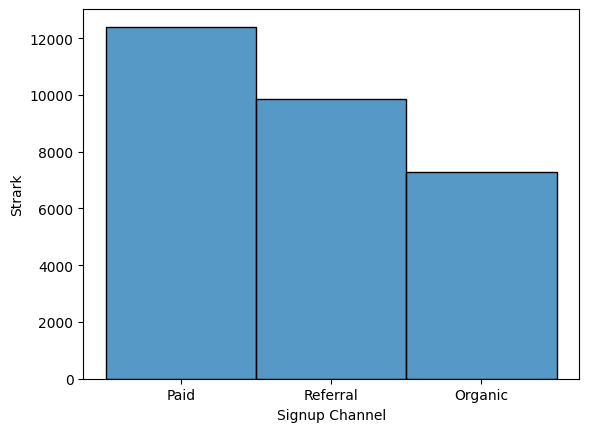

In [7]:
strark_signup_channels = sns.histplot(df_new[df_new["city_name"] == "Strark"], x = "signup_channel")
strark_signup_channels.set(xlabel='Signup Channel', ylabel='Strark')

[Text(0.5, 0, 'Signup Channel'), Text(0, 0.5, 'Wrouver')]

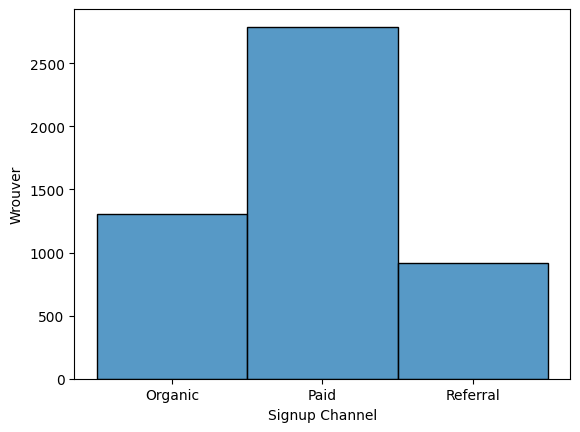

In [8]:
wrouver_signup_channels = sns.histplot(df_new[df_new["city_name"] == "Wrouver"], x = "signup_channel")
wrouver_signup_channels.set(xlabel='Signup Channel', ylabel='Wrouver')

[Text(0.5, 0, 'Signup Channel'), Text(0, 0.5, 'Berton')]

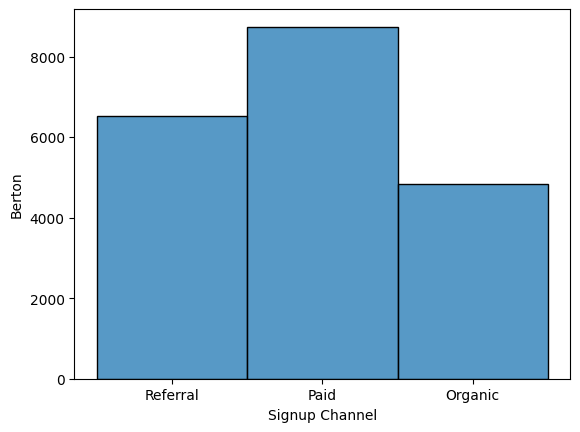

In [9]:
strark_signup_channels = sns.histplot(df_new[df_new["city_name"] == "Berton"], x = "signup_channel")
strark_signup_channels.set(xlabel='Signup Channel', ylabel='Berton')

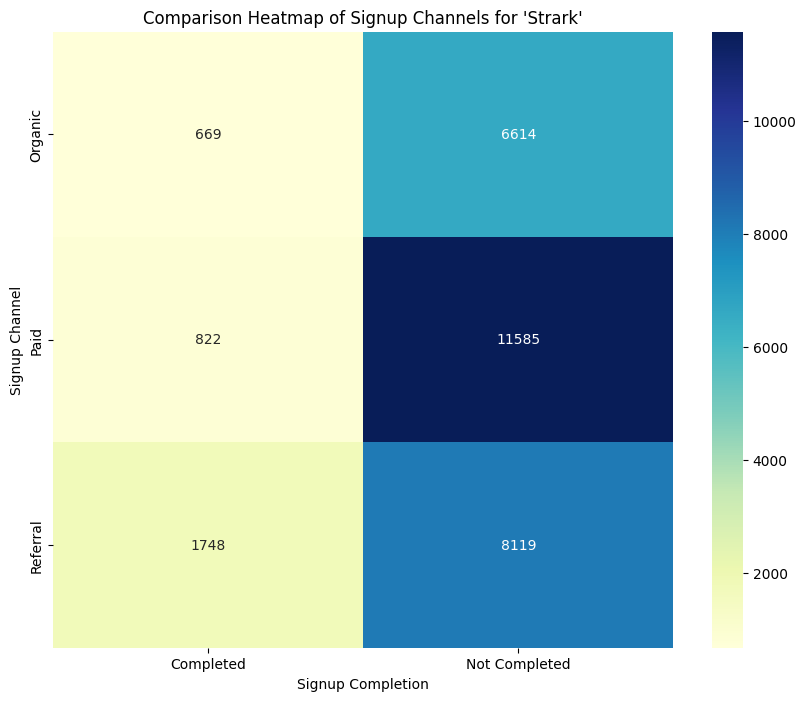

In [10]:
# Heatmap
# Filter the data based on city_name == 'Strark'
df_completed_strark = df_completed[df_completed['city_name'] == 'Strark']
df_not_completed_strark = df_not_completed[df_not_completed['city_name'] == 'Strark']

# Create the counts for the heatmap data
completed_counts = df_completed_strark['signup_channel'].value_counts()
not_completed_counts = df_not_completed_strark['signup_channel'].value_counts()

# Align both series to have the same indices, filling missing values with 0
heatmap_data = pd.DataFrame({"Completed": completed_counts, "Not Completed": not_completed_counts}).fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Comparison Heatmap of Signup Channels for 'Strark'")
plt.xlabel("Signup Completion")
plt.ylabel("Signup Channel")
plt.show()

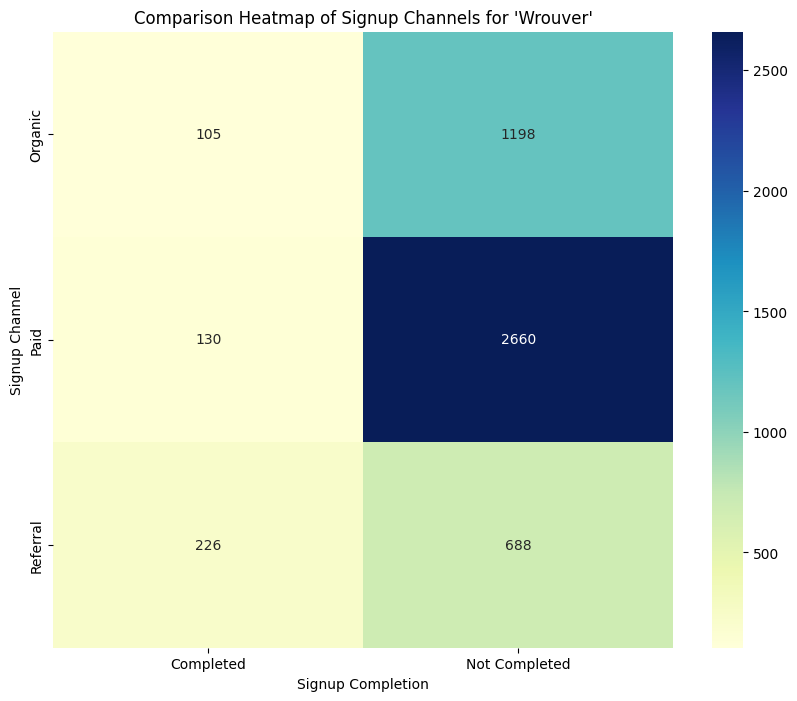

In [11]:
# Heatmap

# Filter the data based on city_name == 'Wrouver'
df_completed_wrourver = df_completed[df_completed['city_name'] == 'Wrouver']
df_not_completed_wrourver = df_not_completed[df_not_completed['city_name'] == 'Wrouver']

# Create the counts for the heatmap data
completed_counts = df_completed_wrourver['signup_channel'].value_counts()
not_completed_counts = df_not_completed_wrourver['signup_channel'].value_counts()

# Align both series to have the same indices, filling missing values with 0
heatmap_data = pd.DataFrame({"Completed": completed_counts, "Not Completed": not_completed_counts}).fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Comparison Heatmap of Signup Channels for 'Wrouver'")
plt.xlabel("Signup Completion")
plt.ylabel("Signup Channel")
plt.show()

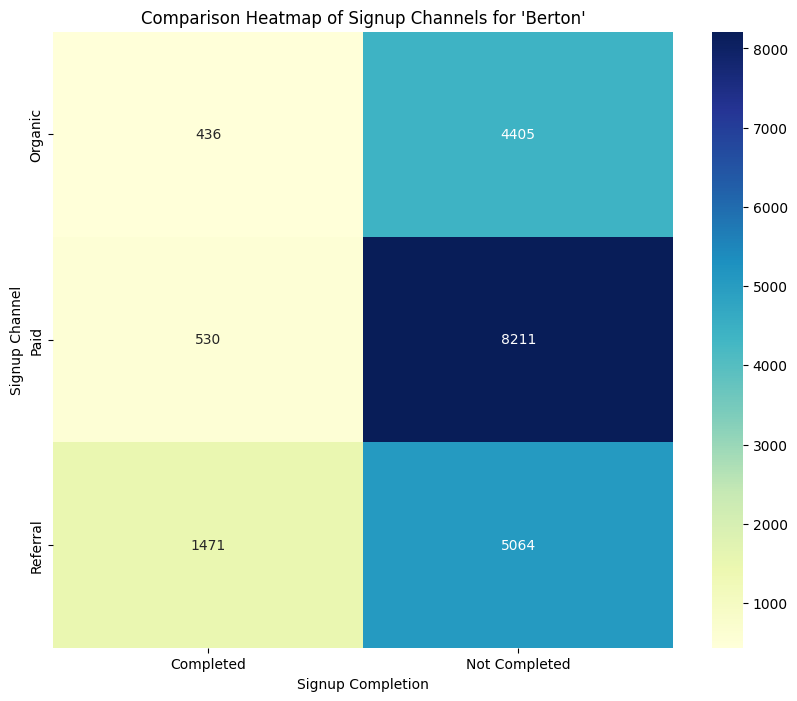

In [12]:
# Heatmap

# Filter the data based on city_name == 'Berton'
df_completed_berton = df_completed[df_completed['city_name'] == 'Berton']
df_not_completed_berton = df_not_completed[df_not_completed['city_name'] == 'Berton']

# Create the counts for the heatmap data
completed_counts = df_completed_berton['signup_channel'].value_counts()
not_completed_counts = df_not_completed_berton['signup_channel'].value_counts()

# Align both series to have the same indices, filling missing values with 0
heatmap_data = pd.DataFrame({"Completed": completed_counts, "Not Completed": not_completed_counts}).fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Comparison Heatmap of Signup Channels for 'Berton'")
plt.xlabel("Signup Completion")
plt.ylabel("Signup Channel")
plt.show()

In [13]:
df_x= df_new[['city_name', 'signup_channel',]]
df_y = df_new['first_completed_date']
df_y
df_x

,city_name,signup_channel
0,Strark,Paid
1,Strark,Paid
2,Wrouver,Organic
3,Berton,Referral
4,Strark,Referral
...,...,...
54676,Strark,Paid
54677,Strark,Paid
54678,Strark,Organic
54679,Berton,Paid


> how do i convert the strings in my dataframe to numbers, 0, 1, 2? so i want my cities strark, wrourver, and berton to be 0, 1, 2 respectively 

In [14]:
df_new_1 = df_new.copy()
df_new_2 = df_new.copy()
df_new_1

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
54676,54677,Strark,other,Paid,1/15/16,NaN,NaN,NaN,NaN,NaN,NaN
54677,54678,Strark,other,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
54678,54679,Strark,ios web,Organic,1/6/16,NaN,NaN,NaN,NaN,NaN,NaN
54679,54680,Berton,android web,Paid,1/18/16,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Mapping Cities for conversion
city_mapping = {'Strark': 0, 'Wrouver': 1, 'Berton': 2}

# Apply the mapping to convert city names to integers
df_new_2['city_name'] = df_new_1['city_name'].map(city_mapping)
df_new_2[['city_name']]

df_new_2

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,0,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,2,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,0,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
54676,54677,0,other,Paid,1/15/16,NaN,NaN,NaN,NaN,NaN,NaN
54677,54678,0,other,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
54678,54679,0,ios web,Organic,1/6/16,NaN,NaN,NaN,NaN,NaN,NaN
54679,54680,2,android web,Paid,1/18/16,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Mapping Incentives for conversion
signup_channel_mapping = {'Organic': 0, 'Paid': 1, 'Referral': 2}

# Apply the mapping to convert city names to integers
df_new_2['signup_channel'] = df_new_1['signup_channel'].map(signup_channel_mapping)
df_new_2[['signup_channel']]

,signup_channel
0,1
1,1
2,0
3,2
4,2
...,...
54676,1
54677,1
54678,0
54679,1


In [17]:
# Mapping Dates for conversion
# Convert null values to 0 and non-null values to 1 in a specific column
df_new_2['first_completed_date'] = df_new_1['first_completed_date'].notnull().astype(int)
df_new_2[['first_completed_date']]

,first_completed_date
0,0
1,0
2,0
3,1
4,0
...,...
54676,0
54677,0
54678,0
54679,0


In [18]:
df_x = df_new_2[['city_name', 'signup_channel',]]
df_y = df_new_2['first_completed_date']
df_y
df_x

,city_name,signup_channel
0,0,1
1,0,1
2,1,0
3,2,2
4,0,2
...,...,...
54676,0,1
54677,0,1
54678,0,0
54679,2,1


In [19]:
df_x = df_new_2[['city_name', 'signup_channel',]]
df_y = df_new_2['first_completed_date']

X_train, X_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2)

print(f'Total data points: {len(df_x)}')
print(f'Training data points: {len(X_train)}')
print(f'Testing data points: {len(X_test)}')
y_train

Total data points: 54681
Training data points: 43744
Testing data points: 10937


2274     0
4414     0
36920    0
49257    0
29983    0
        ..
1369     0
26263    0
1559     0
10144    0
42669    1
Name: first_completed_date, Length: 43744, dtype: int64

In [20]:
#create your tree.DecisionTreeClassifier()
model = tree.DecisionTreeClassifier()

#train your model using .fit()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8885434762732011

In [21]:
model.score(X_test, y_test)

0.8885434762732011

> i want to make a confusion matrix for my test and train

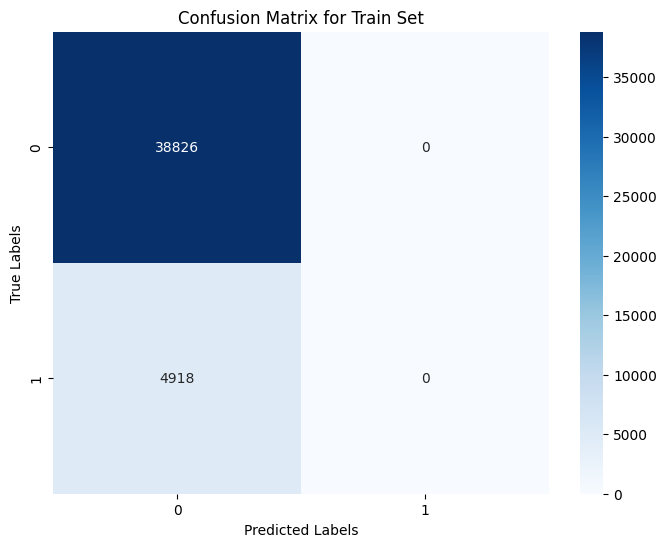

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Using existing model

# Train confusion matrix
y_train_pred = model.predict(X_train)
plot_confusion_matrix(y_train, y_train_pred, 'Confusion Matrix for Train Set')

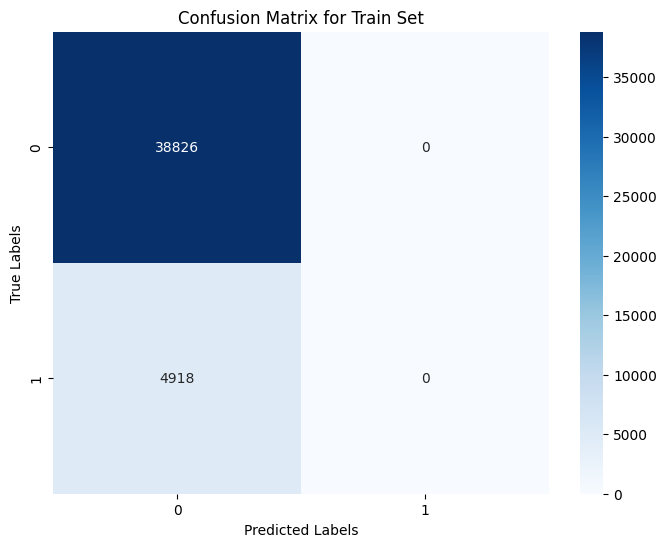

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Reinitialize the model since it seems not recognized
from sklearn.tree import DecisionTreeClassifier

# Retrain the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

def plot_confusion_matrix(y_true, y_pred, title):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Train confusion matrix
y_train_pred = model.predict(X_train)
plot_confusion_matrix(y_train, y_train_pred, 'Confusion Matrix for Train Set')

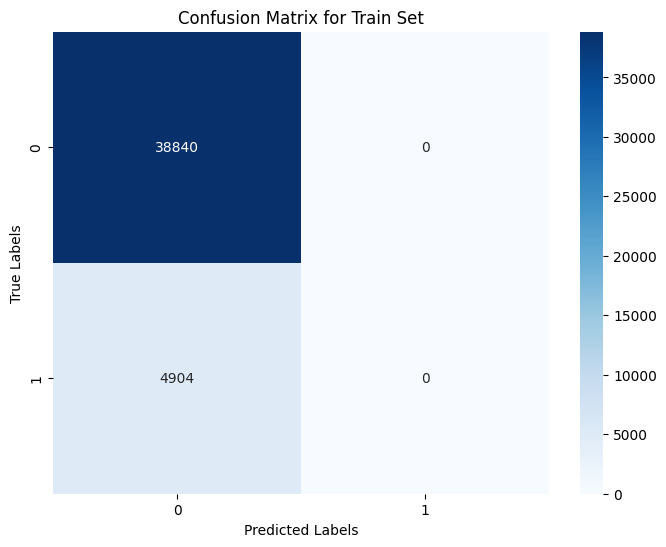

In [24]:
# Reinitialize train-test split from preserved data
from sklearn.model_selection import train_test_split

# Splitting the data again
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Reinitialize and train the model from preserved split data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

def plot_confusion_matrix(y_true, y_pred, title):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Train confusion matrix
y_train_pred = model.predict(X_train)
plot_confusion_matrix(y_train, y_train_pred, 'Confusion Matrix for Train Set')

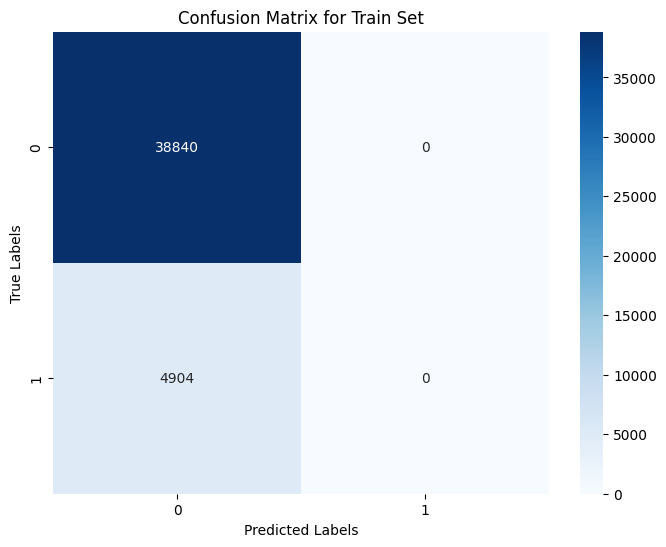

In [25]:
# Recreate df_x and df_y from the previous setup
df_x = df_new_2[['city_name', 'signup_channel']]
df_y = df_new_2['first_completed_date']

# Splitting the data again
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Reinitialize and train the model from preserved split data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

def plot_confusion_matrix(y_true, y_pred, title):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Train confusion matrix
y_train_pred = model.predict(X_train)
plot_confusion_matrix(y_train, y_train_pred, 'Confusion Matrix for Train Set')

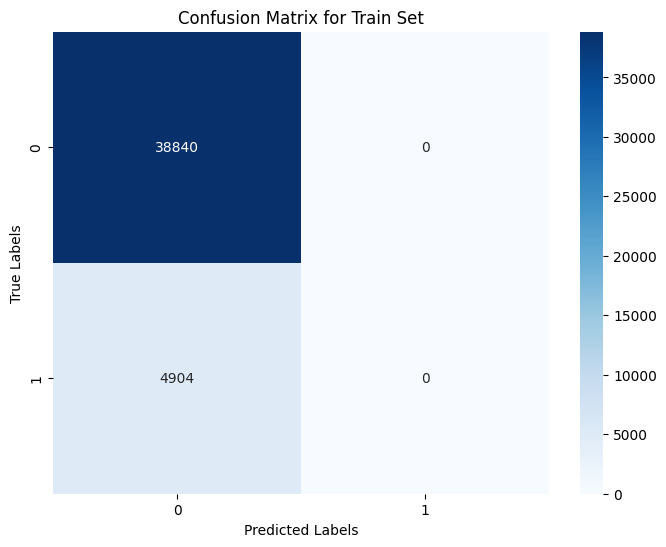

In [26]:
# Recreate df_new_2 from scratch with the same transformations executed previously
df_new_2 = df_new.copy()

# Mapping cities for conversion
city_mapping = {'Strark': 0, 'Wrouver': 1, 'Berton': 2}
df_new_2['city_name'] = df_new['city_name'].map(city_mapping)

# Mapping incentives for conversion
signup_channel_mapping = {'Organic': 0, 'Paid': 1, 'Referral': 2}
df_new_2['signup_channel'] = df_new['signup_channel'].map(signup_channel_mapping)

# Mapping completion status
# Convert null values to 0 and non-null values to 1 in a specific column
df_new_2['first_completed_date'] = df_new['first_completed_date'].notnull().astype(int)

df_x = df_new_2[['city_name', 'signup_channel']]
df_y = df_new_2['first_completed_date']

# Splitting the data again
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Reinitialize and train the model after re-splitting
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

def plot_confusion_matrix(y_true, y_pred, title):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Generate predictions for train set
y_train_pred = model.predict(X_train)
# Confusion matrix for train set
plot_confusion_matrix(y_train, y_train_pred, 'Confusion Matrix for Train Set')

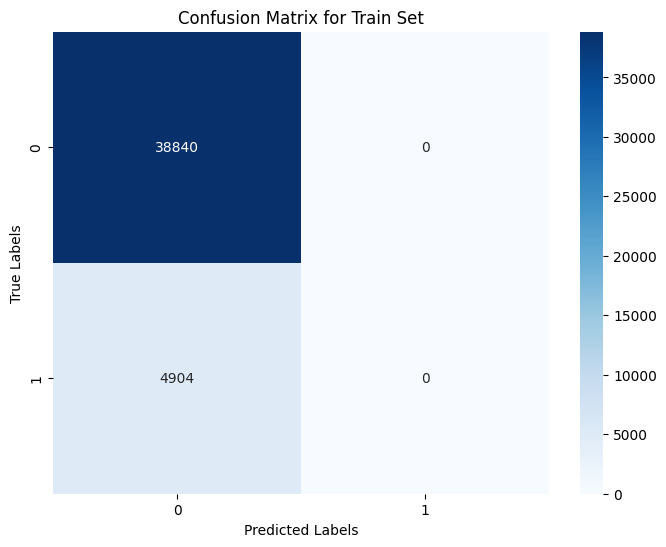

In [27]:
# Re-import the dataset as df_new
import pandas as pd

df_new = pd.read_csv('ds_challenge_v2_1_data.csv')

# Start recreating df_new_2 similarly
df_new_2 = df_new.copy()

# Map city_name
city_mapping = {'Strark': 0, 'Wrouver': 1, 'Berton': 2}
df_new_2['city_name'] = df_new['city_name'].map(city_mapping)

# Map signup_channel
signup_channel_mapping = {'Organic': 0, 'Paid': 1, 'Referral': 2}
df_new_2['signup_channel'] = df_new['signup_channel'].map(signup_channel_mapping)

# Map first_completed_date as binary
# Convert null values to 0 and non-null values to 1
df_new_2['first_completed_date'] = df_new['first_completed_date'].notnull().astype(int)

df_x = df_new_2[['city_name', 'signup_channel']]
df_y = df_new_2['first_completed_date']

# Redo train-test split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Initialize and train the classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

def plot_confusion_matrix(y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Train set confusion matrix
y_train_pred = model.predict(X_train)
plot_confusion_matrix(y_train, y_train_pred, 'Confusion Matrix for Train Set')

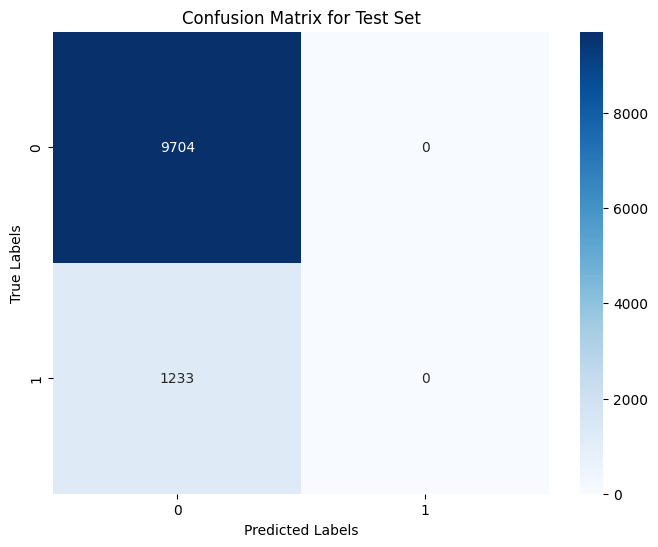

In [28]:
# Test set confusion matrix
y_test_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred, 'Confusion Matrix for Test Set')

The confusion matrices for both the train and test sets have been generated, showing the distribution of predicted vs. actual labels. Let me know if further analysis is required.